# Entropy

## Entropy Chain Rule

$$ H(X_1, X_2, \ldots, X_n) = \sum H(X_i\ \vert\ X_1, \ldots, X_{i-1}) $$

*INCOMPLETE* Show proof.

## Relative Entropy

First, we draw $n$ samples from $\mathcal{N}(0., 1.)$. The we compute the transformation $Y = X^2$.

KL divergence: 0.19354864695650223


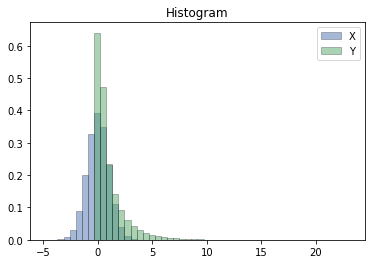

In [63]:
%matplotlib inline

from matplotlib import pyplot as plt
from numpy import abs, histogram
from numpy.random import normal
from scipy.stats import entropy

# Sample
N = 1000000
X_samples = normal(size=N)

# Transform
Y_samples = X_samples ** 2

# Compute the histograms
BINS = 50
RANGE = (0., max(abs(X_samples).max(), Y_samples.max()))

X_histogram, _ = histogram(abs(X_samples), bins=BINS, range=RANGE)
Y_histogram, _ = histogram(Y_samples, bins=BINS, range=RANGE)

# Smooth and normalize
EPS = 1e-8
X_histogram, Y_histogram = X_histogram + EPS, Y_histogram + EPS
X_histogram, Y_histogram = X_histogram / X_histogram.sum(), Y_histogram / Y_histogram.sum()

# Compute KL divergence
kl_divergence = entropy(X_histogram, Y_histogram)
print(f"KL divergence: {kl_divergence}")

# Draw the histograms
RANGE = (X_samples.min(), max(X_samples.max(), Y_samples.max()))
plt.style.use("seaborn-deep")
plt.hist(X_samples, bins=BINS, range=RANGE, alpha=0.5, label="X", density=True, edgecolor="black", linewidth=.5)
plt.hist(Y_samples, bins=BINS, range=RANGE, alpha=0.5, label="Y", density=True, edgecolor="black", linewidth=.5)
plt.title("Histogram")
plt.legend(loc="upper right")
plt.show()